<a href="https://colab.research.google.com/github/Swarn36/Finance_Related/blob/main/Modern_Portfolio_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modern Portfolio Theory

##Import Libraries

I will use markowitz law to enforce the sharpe ratio to work out with better stock portfolio choice.


In [1]:
!pip install yfinance
!pip install scipy

Now necessary libraries will be imported

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import yfinance as yf

Now stating the variables I need to incorporate in this section

In [3]:
stocks = ['BAC', 'KO', 'AAPL', 'COF', 'AXP', 'CVX', 'HPQ', 'MCO', 'DVA'] #stocks ticker code in yahoo finance
start_date = '2010-01-01'
end_date = '2023-01-01'

NUM_TRADING_DAYS = 252
NUM_STOCKS = 10000

##Functions

Let's start with the function calling methods

In [4]:
from prompt_toolkit.shortcuts.progress_bar import Label
#download data from yahoo finance
def download_data():
  stock_data = {}

  for stock in stocks:
    ticker = yf.download(stock, start=start_date, end=end_date)
    stock_data[stock] = ticker['Adj Close']

  return pd.DataFrame(stock_data)

def show_data(data):
  data.plot(figsize=(10, 5))
  plt.show()

#calculating the returns
def calculate_return(data):
  log_daily_returns = np.log(data/data.shift(1)) #shift means the daily return we calculate
  return log_daily_returns[1:]

def show_statistics(returns):
  print(returns.mean()*NUM_TRADING_DAYS)
  print(returns.cov()*NUM_TRADING_DAYS)

def show_mean_variance(returns, weights):
  stock_returns = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
  stock_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))

  print(f'Expected returns: {stock_returns}')
  print(f'Expected volatility: {stock_volatility}')

def generate_portfolio(returns):
  portfolio_returns = []
  portfolio_weights = []
  portfolio_risks = []

  for _ in range(NUM_STOCKS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    portfolio_returns.append(np.sum(returns.mean()*w)*NUM_TRADING_DAYS)
    portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() * NUM_TRADING_DAYS, w))))

  return np.array(portfolio_weights), np.array(portfolio_returns), np.array(portfolio_risks)

#getting the sharpe ratio
def show_portfolio(returns, volatilities):
  plt.figure(figsize=(10, 6))
  plt.scatter(volatilities, returns, c=returns/volatilities, marker='o')
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.grid(True)
  plt.show()

def statistics(weights, returns):
  portfolio_returns = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
  portfolio_risks = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))

  return np.array([portfolio_returns, portfolio_risks, portfolio_returns/portfolio_risks])

def minimum_sharpe(weights, returns):
  return -statistics(weights, returns)[2] #from the statistics function and 3rd index columns values

def optimum_portfolio(weights, returns):
  constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
  bounds = tuple((0, 1) for _ in range(len(stocks))) #sum of the all weights must be equal to 1

  return opt.minimize(fun= minimum_sharpe, x0=weights[0], args=returns, method='SLSQP', bounds=bounds, constraints=constraints)

def print_optimum_portfolio(optimum, returns):
  print(f"Optimum portfolio: {optimum['x'].round(3)}")
  print("Expected returns, volatility and sharpe ratio: ", statistics(optimum['x'].round(3), returns))

def show_optimum_portfolio(opts, rets, portfolio_rets, portfolio_vols):
  plt.figure(figsize=(10, 6))
  plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets/portfolio_vols, marker='o')
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.plot(statistics(opts['x'], rets)[1], statistics(opts['x'],rets)[0], 'r*', markersize= 20)
  plt.grid(True)
  plt.show()

##Output Section

This section covers for the final output code

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  BAC         KO        AAPL        COF         AXP  \
Date                                                                  
2010-01-04  12.977036  18.793238    6.487534  31.711580   33.437019   
2010-01-05  13.398850  18.565899    6.498748  32.962196   33.363472   
2010-01-06  13.555995  18.559313    6.395378  33.140854   33.902782   
2010-01-07  14.002625  1

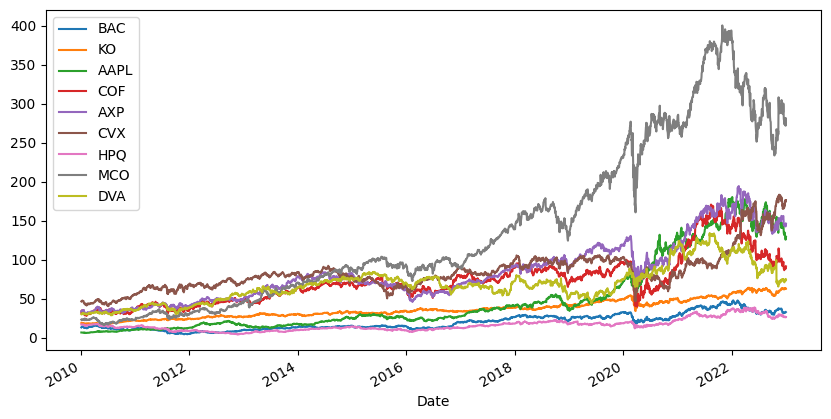

In [5]:
dataset = download_data()
print(dataset)

show_data(dataset)

In [6]:
log_returns = calculate_return(dataset)
print(log_returns)
show_statistics(log_returns)
#stock annual returns and covariances are shown below

                 BAC        KO      AAPL       COF       AXP       CVX  \
Date                                                                     
2010-01-05  0.031988 -0.012171  0.001727  0.038679 -0.002202  0.007058   
2010-01-06  0.011660 -0.000355 -0.016034  0.005405  0.016035  0.000126   
2010-01-07  0.032416 -0.002488 -0.001850  0.048311  0.016089 -0.003774   
2010-01-08 -0.008899 -0.018682  0.006626 -0.008677 -0.000715  0.001763   
2010-01-11  0.008899  0.020105 -0.008861 -0.018061 -0.011508  0.017587   
...              ...       ...       ...       ...       ...       ...   
2022-12-23  0.002467  0.007550 -0.002802  0.013320  0.011699  0.030448   
2022-12-27  0.001846  0.006092 -0.013976  0.000661 -0.004294  0.012492   
2022-12-28  0.007351 -0.010017 -0.031166 -0.011638 -0.016392 -0.014863   
2022-12-29  0.011228  0.005960  0.027931  0.032574  0.022724  0.007543   
2022-12-30 -0.000604 -0.005331  0.002466  0.003125  0.002915  0.006540   

                 HPQ       MCO       

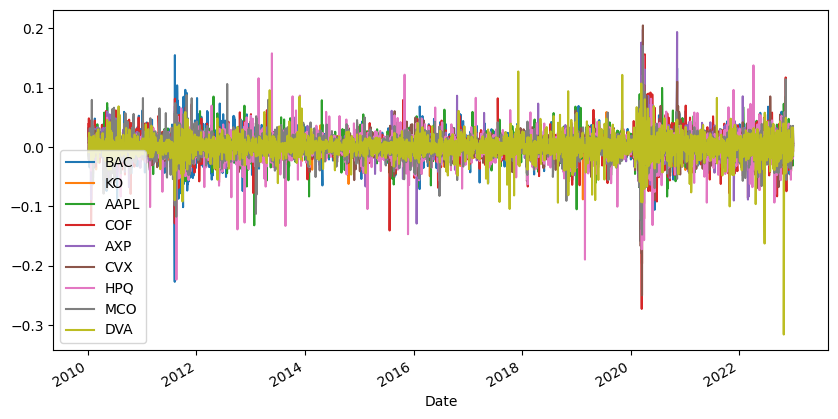

In [7]:
show_data(log_returns)

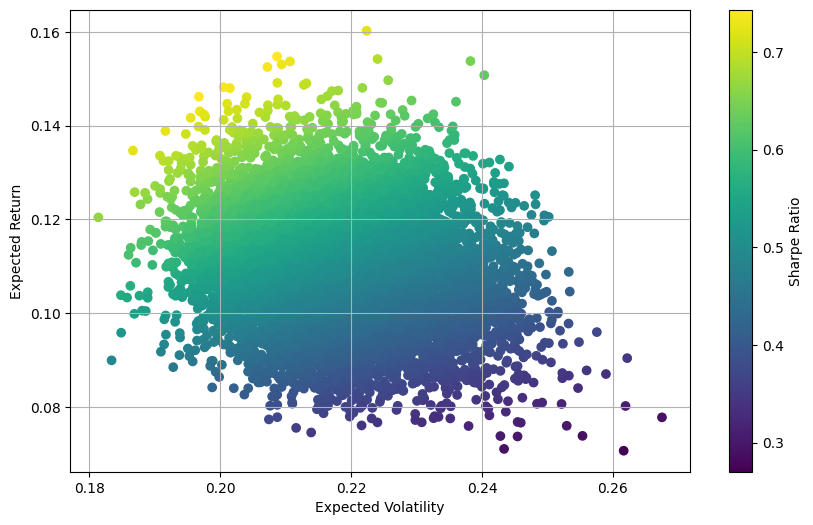

In [8]:
pweights, means, risks = generate_portfolio(log_returns)
show_portfolio(means, risks)

Optimum portfolio: [0.    0.25  0.521 0.    0.    0.    0.    0.229 0.   ]
Expected returns, volatility and sharpe ratio:  [0.18720534 0.21471116 0.87189386]


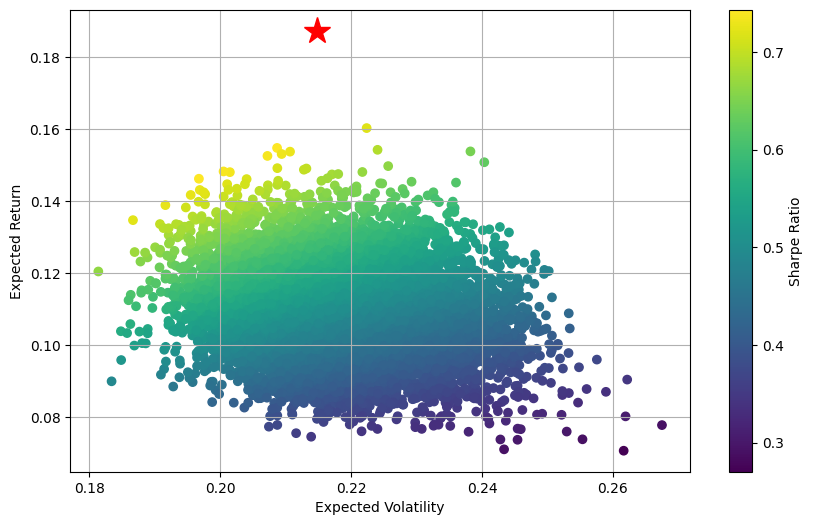

In [9]:
optimum = optimum_portfolio(pweights, log_returns)
print_optimum_portfolio(optimum, log_returns)
show_optimum_portfolio(optimum, log_returns, means, risks)